In [15]:
# ZBIORCZE INFO:
# czytaj info w pliku eda/data_importer


from data_importer import data_importer
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import math
from PIL import Image
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for grayscale conversion
import cv2
plt.style.use('ggplot')

# data
df_images = data_importer.import_images()






../crop_full.zip


### functions definition

In [17]:
def display_random_images(dataframe):
    # Select 16 random rows from the dataframe
    random_selection = dataframe.sample(n=16)

    # Create a 4x4 subplot grid
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    fig.suptitle('Sample Images')

    for i, ax in enumerate(axes.flat):
        # Plot each image
        if i < len(random_selection):
            image_data = random_selection.iloc[i]['Images']
            age = random_selection.iloc[i]['Age'] 

            ax.imshow(image_data)
            ax.axis('off')
            ax.set_title(f'Age: {age}', fontsize=8, y=0.95)  # Display age as a label

    plt.show()

def generate_average_face_per_age(dataframe):
    mean_images = []  # List to store mean images
    ages = []  # List to store corresponding ages
    
    # Group dataframe by 'Age' column
    grouped = dataframe.groupby('Age')

    for age, group in grouped:
        # Get images for each age group
        images = group['Images']

        # Calculate mean image
        mean_image = np.mean(np.array(images.tolist()), axis=0).astype(np.uint8)
        mean_image = Image.fromarray(mean_image)

        # Display or save the average face image
        mean_images.append(mean_image)
        ages.append(age)
        # mean_image.save(f'average_face_age_{age}.png')  # Save average face image with age in filename
    return pd.DataFrame({'Age': ages, 'Images': mean_images})


def display_random_grayscale_images(dataframe):
    # Select 16 random rows from the dataframe
    random_selection = dataframe.sample(n=16)

    # Create a 4x4 subplot grid
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    fig.suptitle('Sample Images')

    for i, ax in enumerate(axes.flat):
        # Plot each image
        if i < len(random_selection):
            image_data = random_selection.iloc[i]['Images']
            age = random_selection.iloc[i]['Age']

            # Convert image to grayscale
            image_data_gray = np.dot(image_data[..., :3], [0.2989, 0.5870, 0.1140])

            ax.imshow(image_data_gray, cmap='gray')  # Display in grayscale
            ax.axis('off')
            ax.set_title(f'Age: {age}', fontsize=8, y=0.95)  # Display age as a label

    plt.show()





def count_images_per_age(dataframe):
    # Grouping by 'Age' column and counting occurrences of each age
    age_counts = dataframe['Age'].value_counts().sort_index()
    return age_counts

def count_image_per_race(dataframe):
    
    race_counts = dataframe['Race'].value_counts().sort_index()
    return race_counts

def count_image_per_gender(dataframe):
    
    gender_counts = dataframe['Gender'].value_counts().sort_index()
    return gender_counts

### filters fuctions definition (odpal to zanim odpalisz filtry)

In [18]:
def calculate_image_features(image_array):
    """Oblicza jasność i kontrast obrazu."""
    brightness = np.mean(image_array)  # Średnia jasność
    contrast = np.std(image_array)     # Standardowe odchylenie pikseli dla kontrastu
    return brightness, contrast

def apply_gabor_filter(image, kernel_size=31, sigma=4.0, theta=0, lam=10.0, gamma=0.5, psi=0):
   
    gabor_kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, lam, gamma, psi, ktype=cv2.CV_32F)
    filtered_image = cv2.filter2D(image, -1, gabor_kernel)
    return filtered_image

def aplly_ege_filter(img):
    min_intensity_grad, max_intensity_grad = 100, 200
    edge_img = cv2.Canny(img, min_intensity_grad, max_intensity_grad) 
    return edge_img

brightness = []
contrast = []
brightness_after_gabor = []
contrast_after_gabor = []

brightness_after_edgedetection=[]
contrast_after_edgedetection=[]

for img_array in df_images['Images']:
    # Stosowanie filtru Gabora
    filtered_image = apply_gabor_filter(img_array)
    edge_image=aplly_ege_filter(img_array)

    # Obliczanie cech po filtrze
    img_brightness, img_contrast = calculate_image_features(filtered_image)
    brightness_after_gabor.append(img_brightness)
    contrast_after_gabor.append(img_contrast)

    img_brightness, img_contrast = calculate_image_features(img_array)
    brightness.append(img_brightness)
    contrast.append(img_contrast)

    img_brightness, img_contrast = calculate_image_features(edge_image)
    brightness_after_edgedetection.append(img_brightness)
    contrast_after_edgedetection.append(img_contrast)

df_images['Brightness'] = brightness
df_images['Contrast'] = contrast
df_images['BrightnessAfterGabor'] = brightness_after_gabor
df_images['ContrastAfterGabor'] = contrast_after_gabor
df_images['BrightnessAfterEdge']=brightness_after_edgedetection
df_images['ContrastAfterEdge']=contrast_after_edgedetection

### basic image

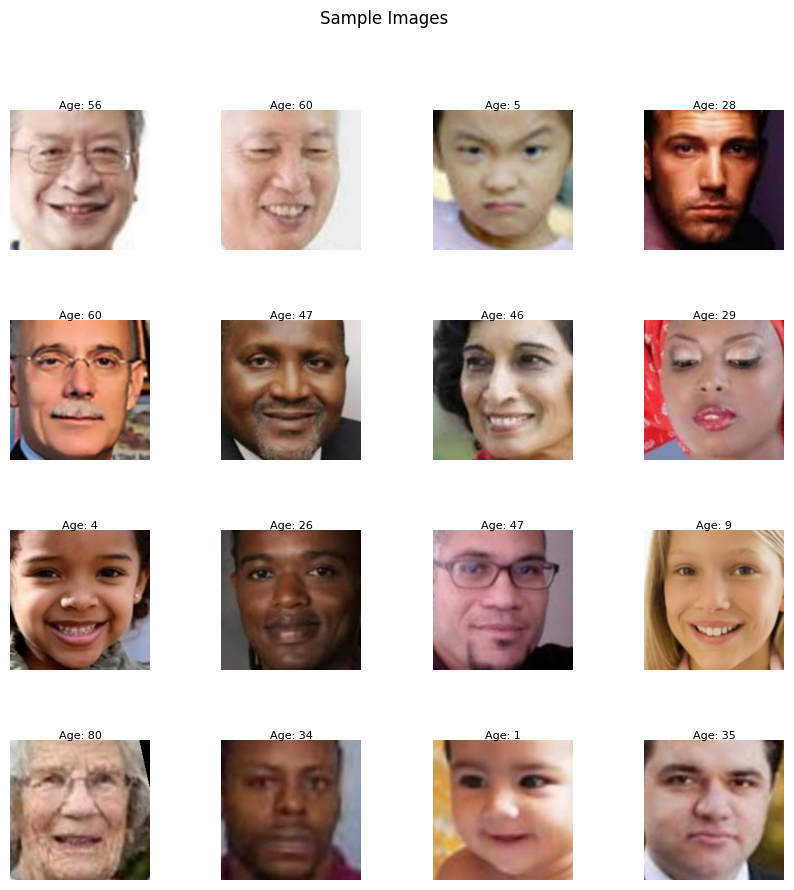

In [6]:
display_random_images(df_images)


### mean faces for each age

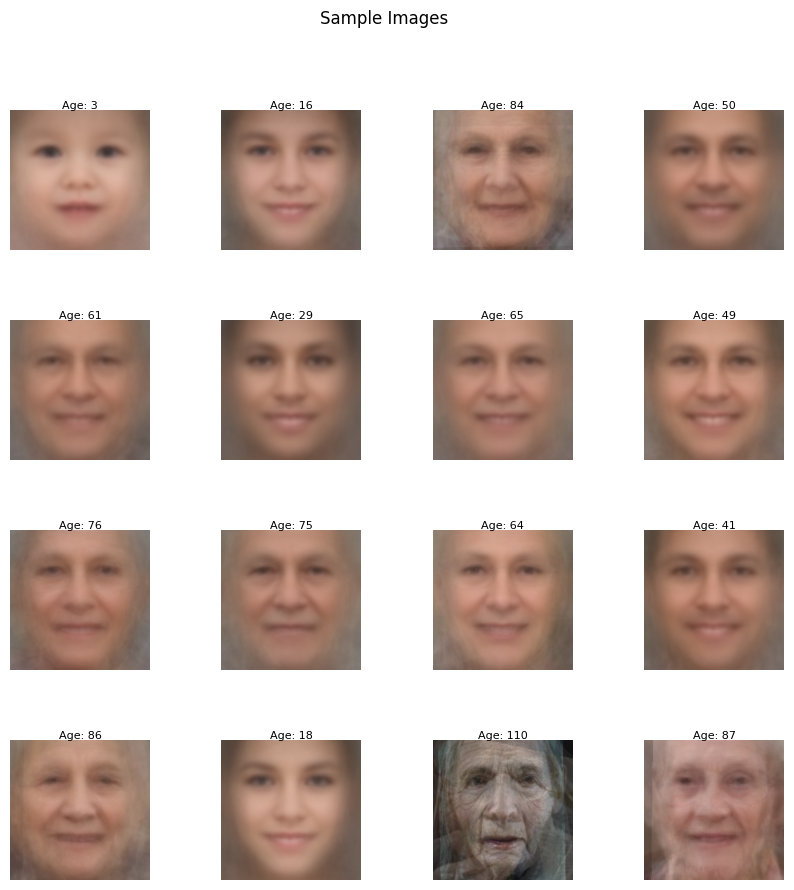

In [10]:
df_mean_faces = generate_average_face_per_age(df_images)
display_random_images(df_mean_faces)

### gender distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


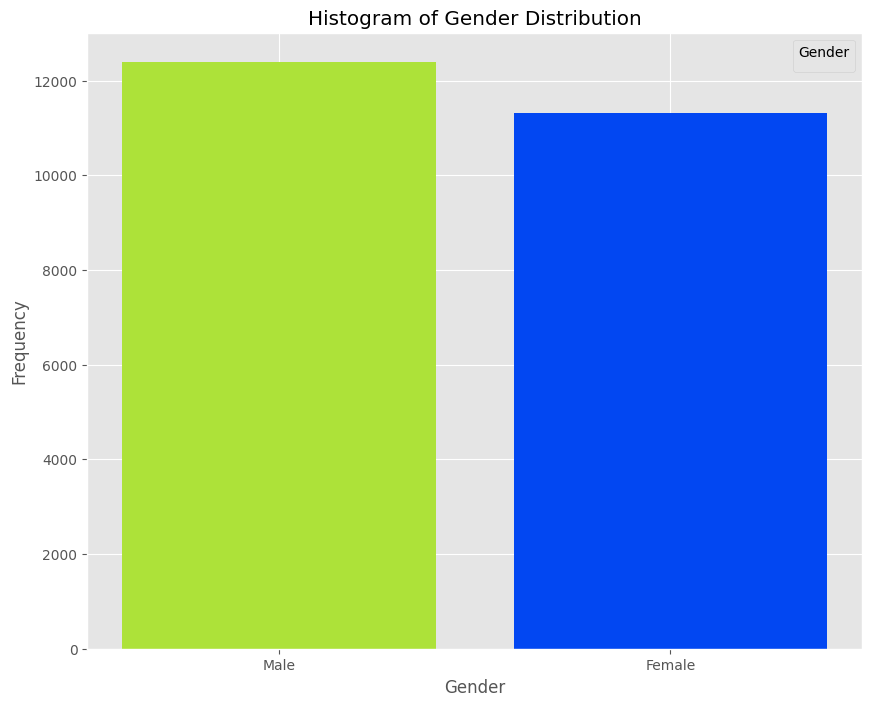

In [8]:

plt.figure(figsize=(10, 8))
labels=['Male', 'Female']
gender_freq=count_image_per_gender(df_images)
plt.bar(labels,gender_freq,color=np.random.rand(len(labels),3));
plt.title('Histogram of Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.show()

### Histogram age


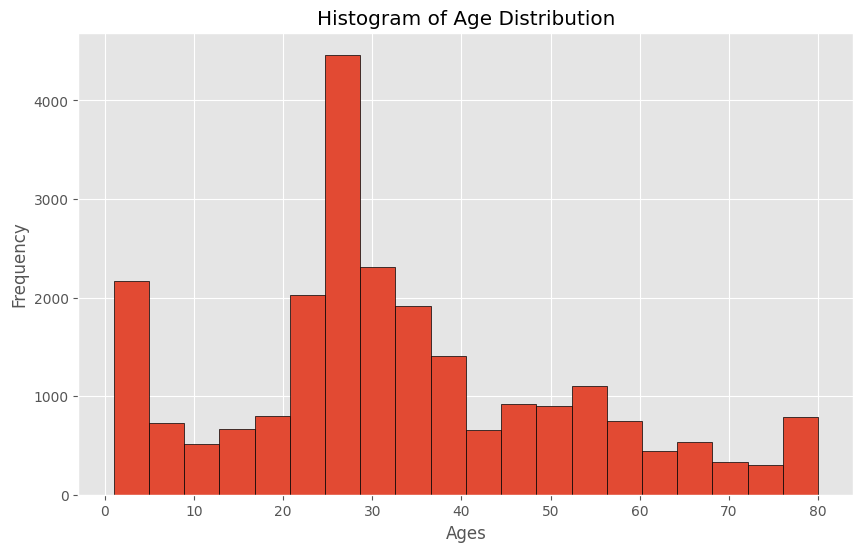

In [9]:
# ilosc osob w danym wieku
plt.figure(figsize=(10, 6))
plt.hist(df_images['Age'], bins=20, edgecolor='black')
plt.title('Histogram of Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

### Race histogram 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


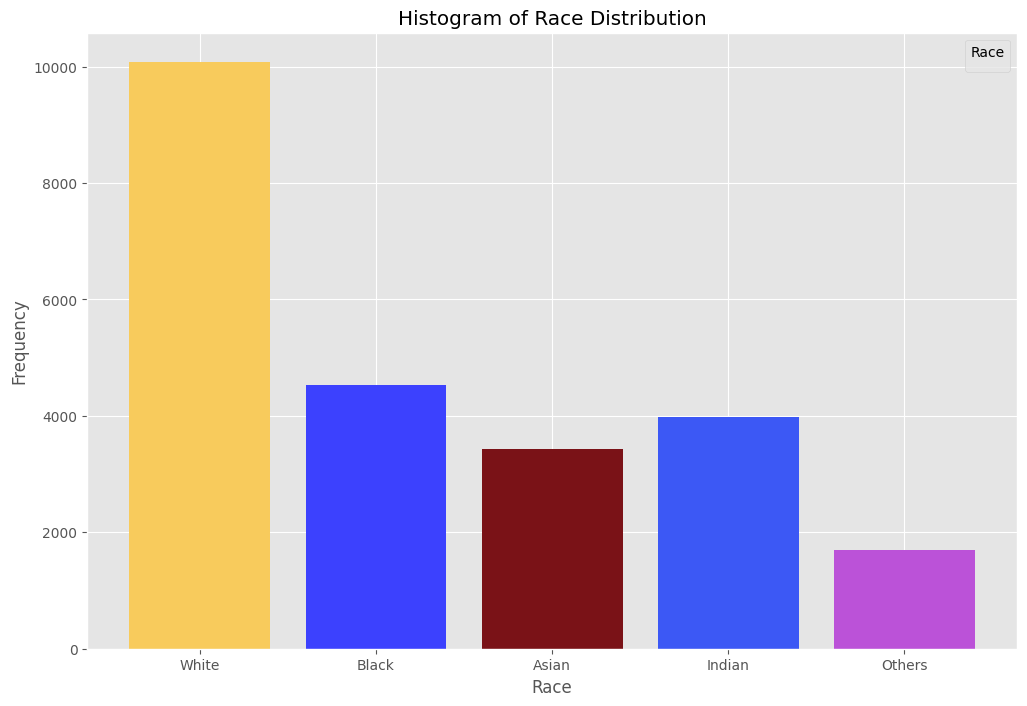

In [10]:
plt.figure(figsize=(12, 8))
labels=['White', 'Black', 'Asian', 'Indian', 'Others']
races_freq=count_image_per_race(df_images)
plt.bar(labels,races_freq,color=np.random.rand(len(labels),3))
plt.title('Histogram of Race Distribution')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.legend(title='Race')
plt.show()

### Size histogram


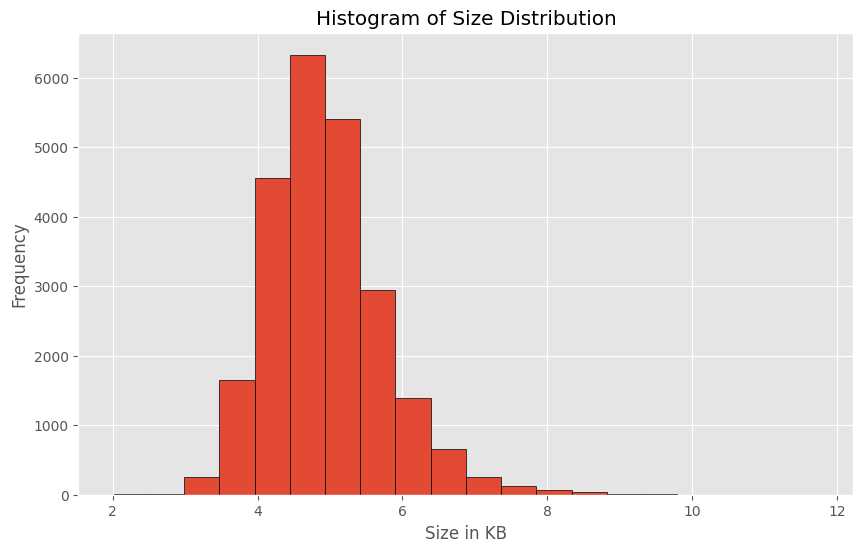

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df_images['Size'], bins=20, edgecolor='black')
plt.title('Histogram of Size Distribution')
plt.xlabel('Size in KB')
plt.ylabel('Frequency')
plt.show()

### Histogram of Average Image Size by Age

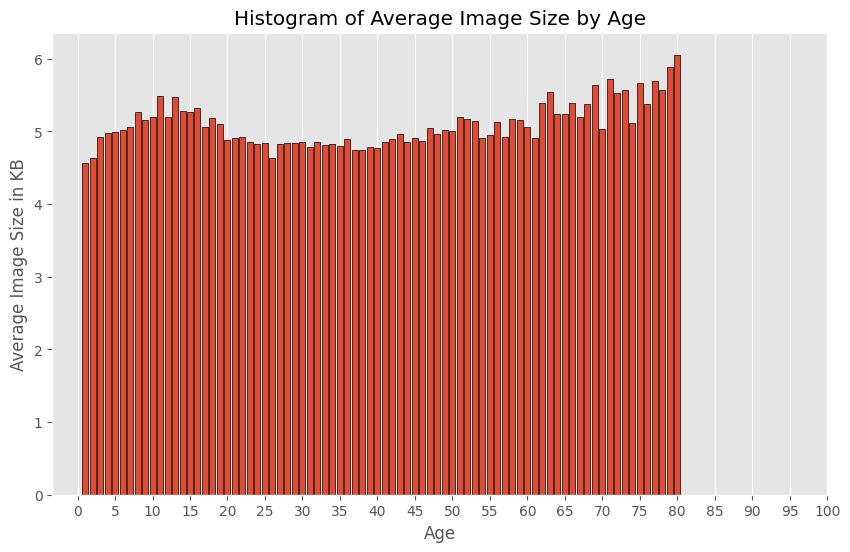

In [12]:
age_group = df_images.groupby('Age')['Size'].mean()
plt.figure(figsize=(10, 6))
plt.bar(age_group.index, age_group.values, edgecolor='black')
plt.title('Histogram of Average Image Size by Age')
plt.xlabel('Age')
plt.ylabel('Average Image Size in KB')
plt.xticks(np.arange(0, 101, 5))
plt.grid(axis='y')
plt.show()

### Histogram of Brightness

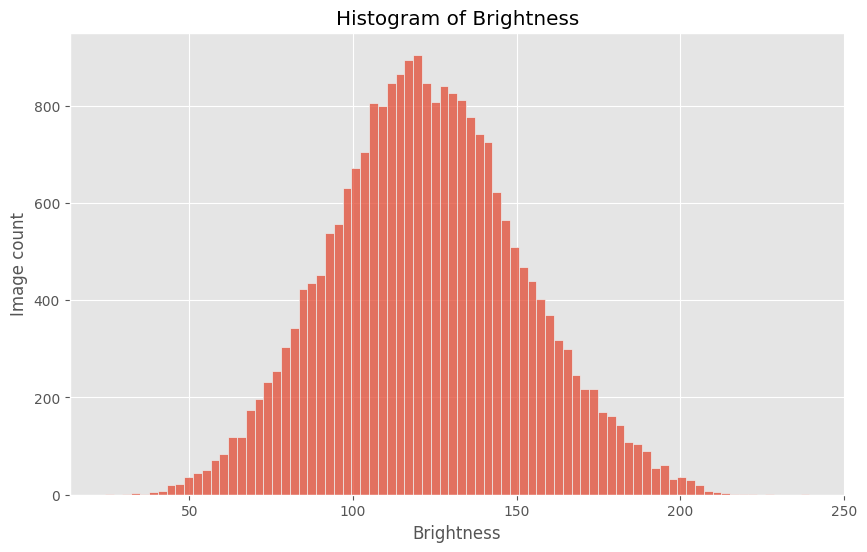

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_images, x='Brightness')
plt.title('Histogram of Brightness')
plt.xlabel('Brightness')
plt.ylabel('Image count')
plt.show()

### Histogram of Contrast

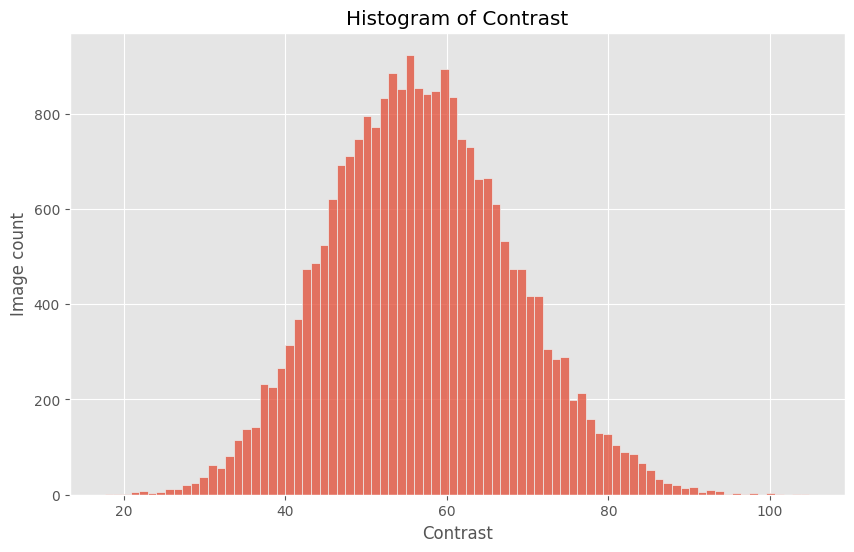

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_images, x='Contrast')
plt.title('Histogram of Contrast')
plt.xlabel('Contrast')
plt.ylabel('Image count')
plt.show()

### Average brightness by age'


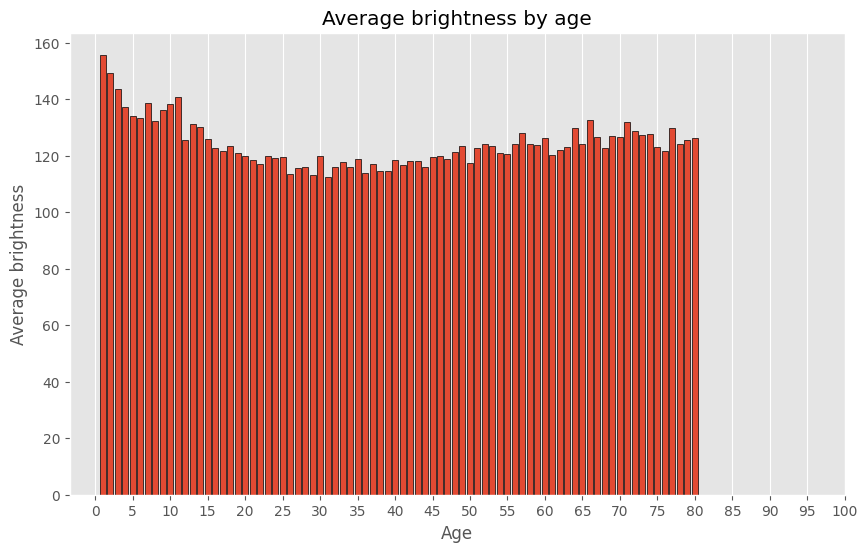

In [21]:
average_brightness_by_age = df_images.groupby('Age')['Brightness'].mean()
plt.figure(figsize=(10, 6))
plt.bar(average_brightness_by_age.index, average_brightness_by_age.values, edgecolor='black')
plt.title('Average brightness by age')
plt.xlabel('Age')
plt.ylabel('Average brightness')
plt.xticks(np.arange(0, 101, 5))
plt.grid(axis='y')
plt.show()

### Average contrast by age

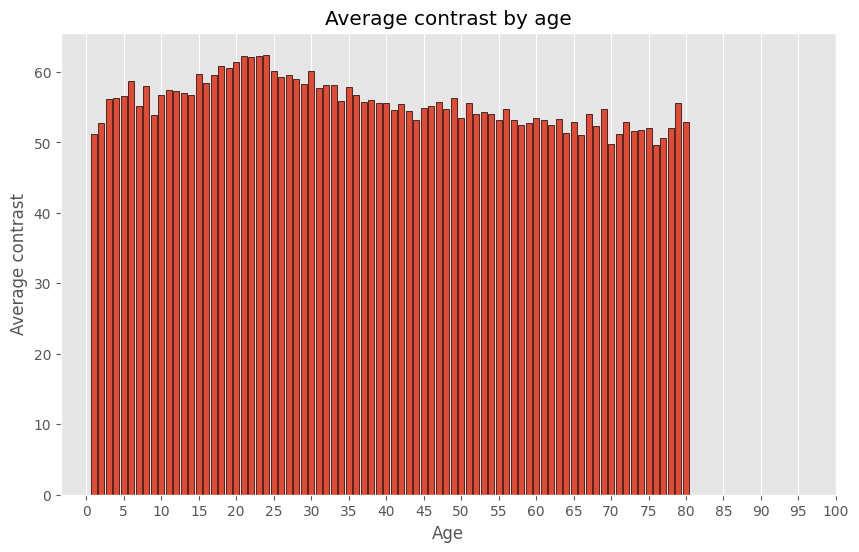

In [22]:
average_contrast_by_age = df_images.groupby('Age')['Contrast'].mean()
plt.figure(figsize=(10, 6))
plt.bar(average_contrast_by_age.index, average_contrast_by_age.values, edgecolor='black')
plt.title('Average contrast by age')
plt.xlabel('Age')
plt.ylabel('Average contrast')
plt.xticks(np.arange(0, 101, 5))
plt.grid(axis='y')
plt.show()

### Grayscale images

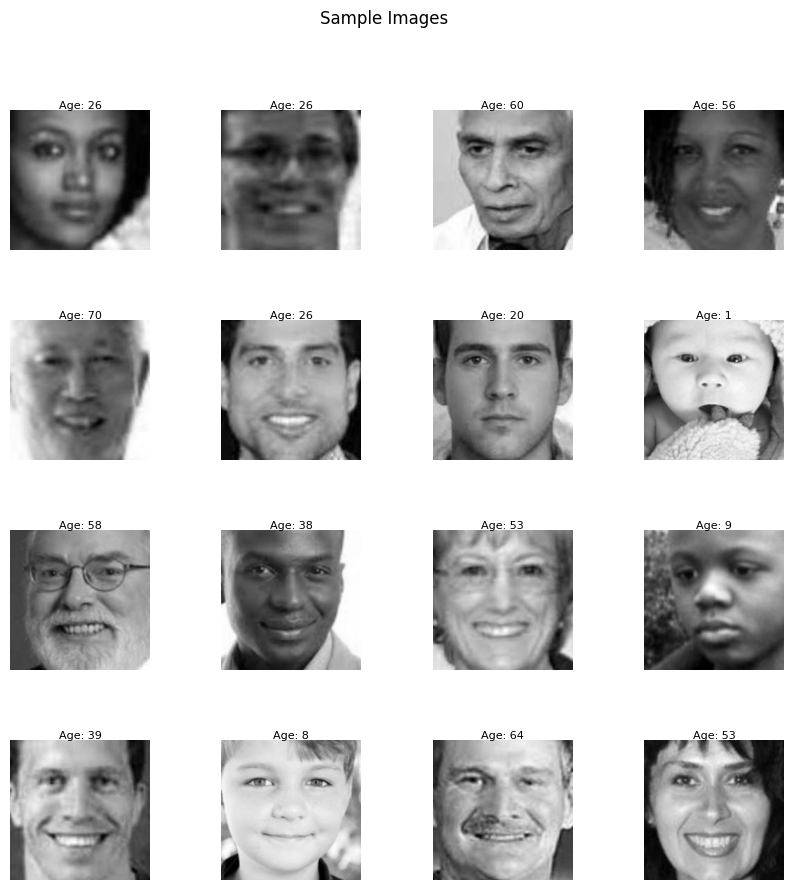

In [11]:
display_random_grayscale_images(df_images)

## Gabor filters

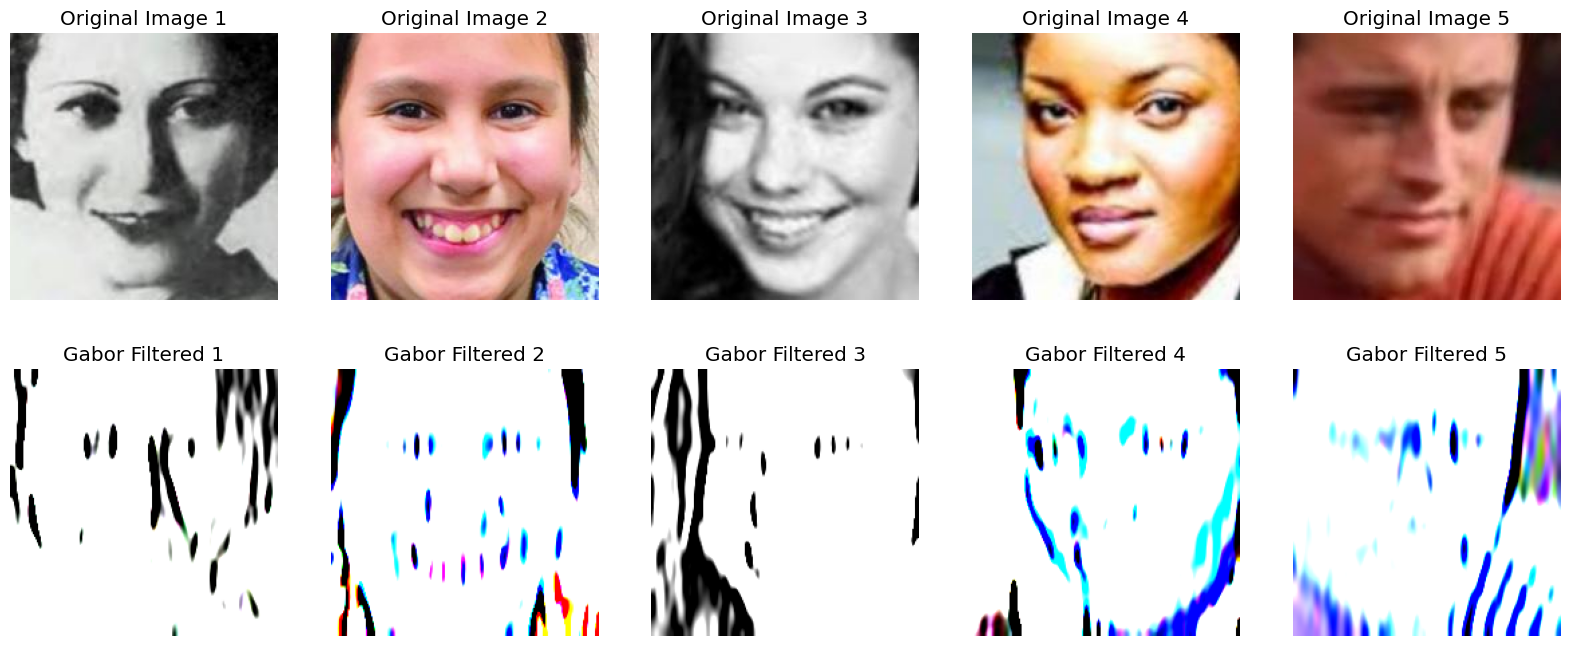

In [36]:
sample_images = df_images['Images'].sample(5)
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, img_array in enumerate(sample_images):
    axs[0, i].imshow(img_array)
    axs[0, i].set_title(f'Original Image {i+1}')
    axs[0, i].axis('off')
    gabor_image = apply_gabor_filter(img_array)
    axs[1, i].imshow(cv2.cvtColor(gabor_image, cv2.COLOR_BGR2RGB))
    axs[1, i].set_title(f'Gabor Filtered {i+1}')
    axs[1, i].axis('off')
plt.show()

### BrightnessAfterGabor

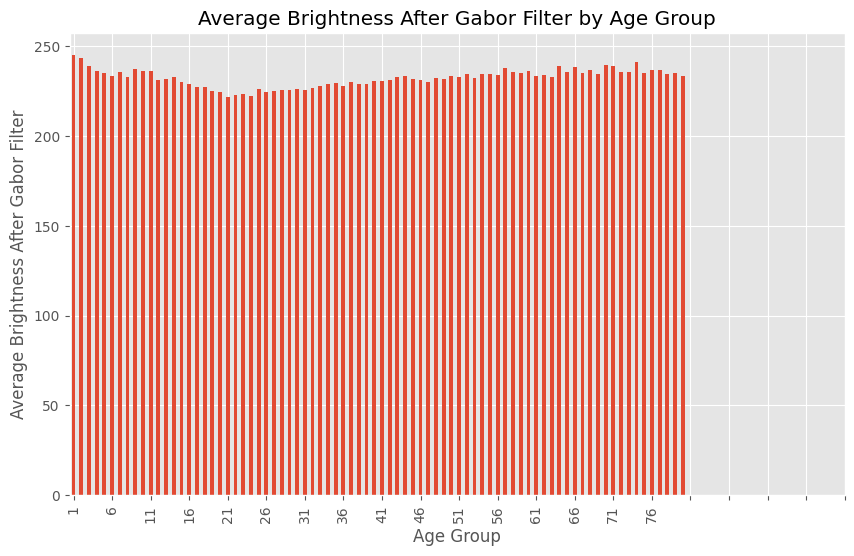

In [25]:
average_brightness_by_class = df_images.groupby('Age')['BrightnessAfterGabor'].mean()
plt.figure(figsize=(10, 6))
average_brightness_by_class.plot(kind='bar')
plt.title('Average Brightness After Gabor Filter by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Brightness After Gabor Filter')
plt.xticks(np.arange(0, 101, 5))
plt.show()

### ContrastAfterGabor

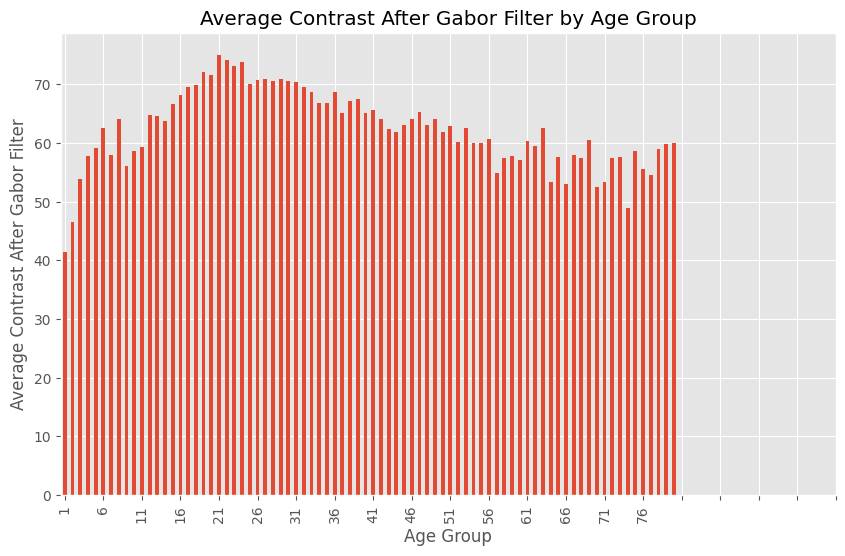

In [26]:
average_contrast_by_class = df_images.groupby('Age')['ContrastAfterGabor'].mean()
plt.figure(figsize=(10, 6))
average_contrast_by_class.plot(kind='bar')
plt.title('Average Contrast After Gabor Filter by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Contrast After Gabor Filter')
plt.xticks(np.arange(0, 101, 5))
plt.show()


### BrightnessAfterEdge

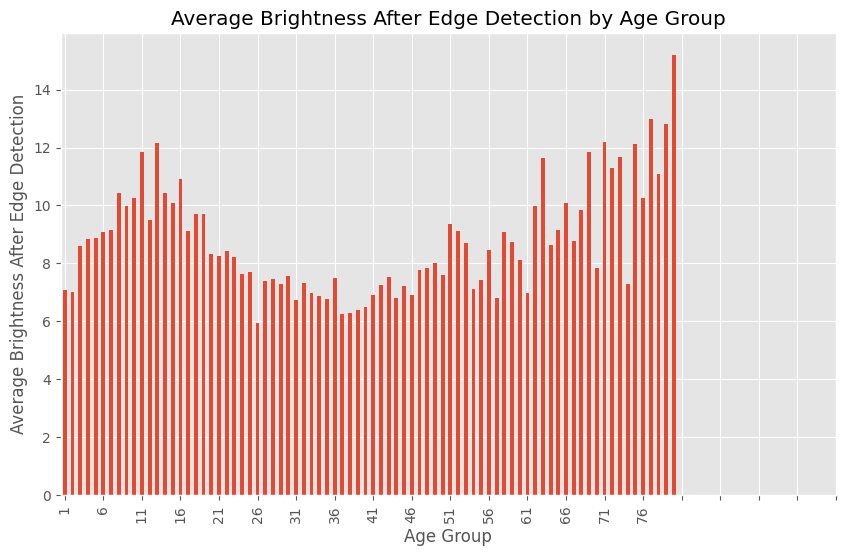

In [28]:
average_brightness_by_class = df_images.groupby('Age')['BrightnessAfterEdge'].mean()
plt.figure(figsize=(10, 6))
average_brightness_by_class.plot(kind='bar')
plt.title('Average Brightness After Edge Detection by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Brightness After Edge Detection')
plt.xticks(np.arange(0, 101, 5))
plt.show()


### Average Contrast After Edge Detection by Age Group

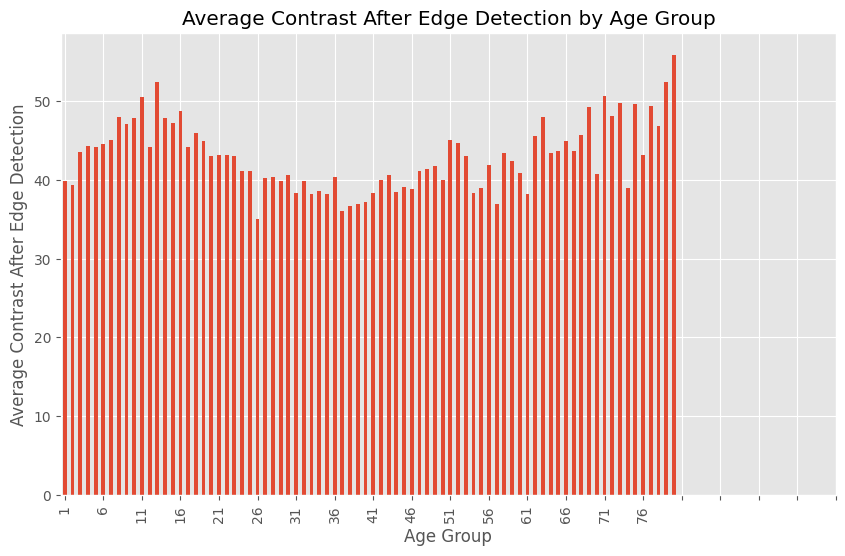

In [29]:
average_contrast_by_class = df_images.groupby('Age')['ContrastAfterEdge'].mean()
plt.figure(figsize=(10, 6))
average_contrast_by_class.plot(kind='bar')
plt.title('Average Contrast After Edge Detection by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Contrast After Edge Detection')
plt.xticks(np.arange(0, 101, 5))
plt.show()

### bilateral  laplacian i gaussian filtrs

In [51]:

def apply_laplacian_filter(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return cv2.convertScaleAbs(laplacian)

def apply_bilateral_filter(image, d=15, sigma_color=300, sigma_space=400):
    return cv2.bilateralFilter(image, d, sigma_color, sigma_space)

def apply_gaussian_blur(image, kernel_size=(15, 15)):
    return cv2.GaussianBlur(image, kernel_size,0)

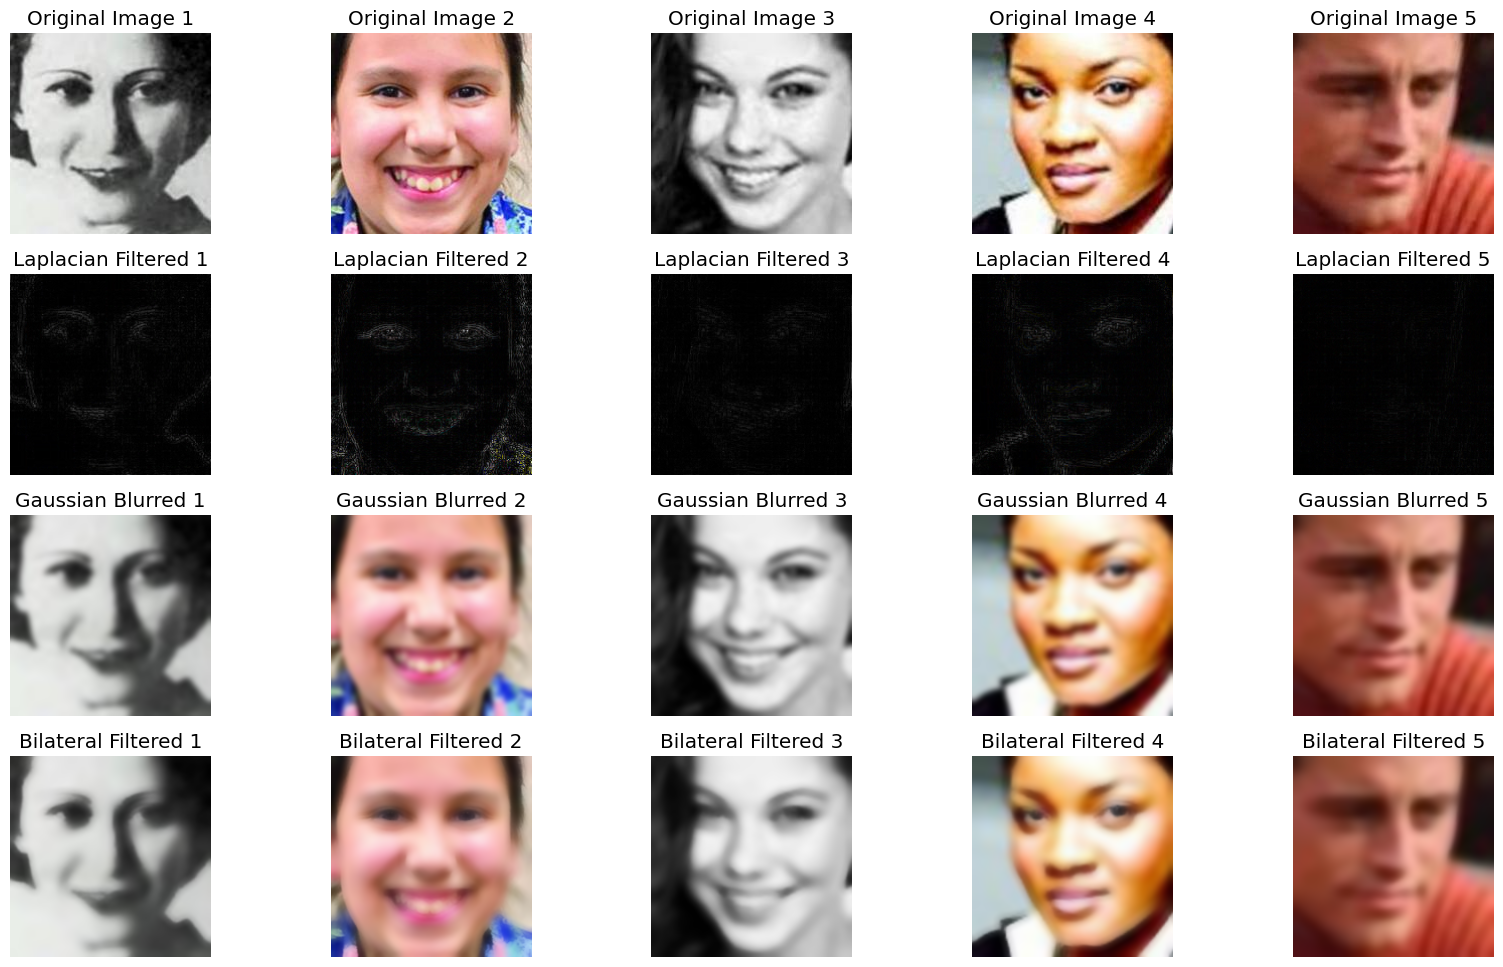

In [54]:
fig, axs = plt.subplots(4, 5, figsize=(20, 12))

for i, img_array in enumerate(sample_images):
    axs[0, i].imshow(img_array)
    axs[0, i].set_title(f'Original Image {i+1}')
    axs[0, i].axis('off')

    laplacian_image = apply_laplacian_filter(img_array)
    axs[1, i].imshow(laplacian_image)
    axs[1, i].set_title(f'Laplacian Filtered {i+1}')
    axs[1, i].axis('off')

    gaussian_image = apply_gaussian_blur(img_array)
    axs[2, i].imshow(gaussian_image)
    axs[2, i].set_title(f'Gaussian Blurred {i+1}')
    axs[2, i].axis('off')

    bilateral_image = apply_bilateral_filter(img_array)
    axs[3, i].imshow(bilateral_image)
    axs[3, i].set_title(f'Bilateral Filtered {i+1}')
    axs[3, i].axis('off')

plt.show()